In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging

from src.interface_representation.interface_transformations import InterfaceRepresentationType
from src.datasets.phi_field_dataset import PhiDataset, PatchPhiDataset
from src.paths import project_dir

logging.basicConfig(level=logging.INFO)

In [2]:
dataset_tanh = PhiDataset(data_dir=project_dir() / 'data',
                     split='train',
                     debug=True,
                     interface_rep=InterfaceRepresentationType.TANH,
                     epsilon=1/256
                     )

dataset_sdf = PhiDataset(data_dir=project_dir() / 'data',
                         split='train',
                         debug=True,
                         interface_rep=InterfaceRepresentationType.SDF
                         )

INFO:src.datasets.phi_field_dataset:Constructed splits of size (number of runs NOT snapshots): train=10, val=2
INFO:src.datasets.phi_field_dataset:Loaded 3 files for split train
INFO:src.datasets.phi_field_dataset:First file: /Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/data/2023-05-12-09-22-Folder_999_Restart_001_0.125091.npz
INFO:src.datasets.phi_field_dataset:Generated 3 samples of HIT data with interface representation InterfaceRepresentationType.TANH
INFO:src.datasets.phi_field_dataset:Each sample has shape torch.Size([1, 256, 256, 256])
INFO:src.datasets.phi_field_dataset:Constructed splits of size (number of runs NOT snapshots): train=10, val=2
INFO:src.datasets.phi_field_dataset:Loaded 3 files for split train
INFO:src.datasets.phi_field_dataset:First file: /Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/data/2023-05-12-09-22-Folder_999_Restart_001_0.125091.npz
INFO:src.datasets.phi_field_dataset:Generated 3 samples of HIT data with

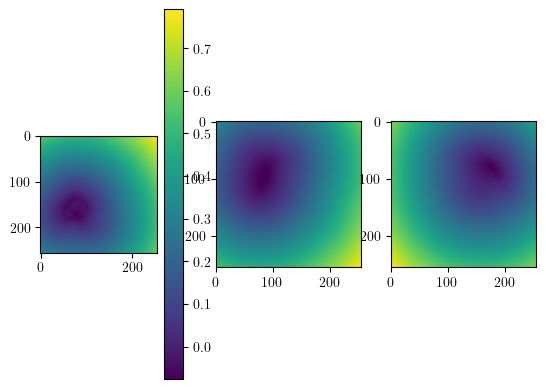

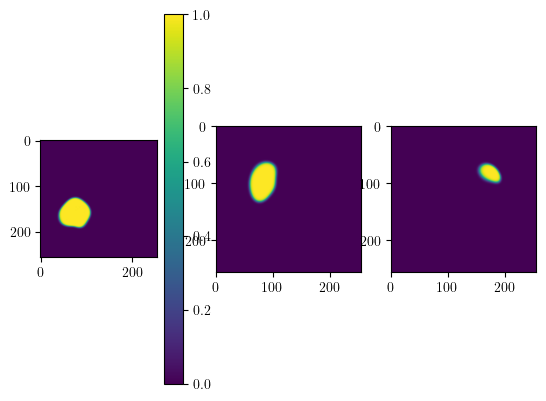

In [3]:
# Visualise 3 orthogonal slices from element of dataset
ind = 1
arr_sdf = dataset_sdf[ind][0].numpy()
arr_tanh = dataset_tanh[ind][0].numpy()

fig, axs = plt.subplots(1, 3)
im = axs[0].imshow(arr_sdf[128, :, :])
axs[1].imshow(arr_sdf[:, 128, :])
axs[2].imshow(arr_sdf[:, :, 128])
fig.colorbar(im, ax=axs[0])
plt.show()

fig, axs = plt.subplots(1, 3)
im = axs[0].imshow(arr_tanh[128, :, :])
axs[1].imshow(arr_tanh[:, 128, :])
axs[2].imshow(arr_tanh[:, :, 128])
fig.colorbar(im, ax=axs[0])
plt.show()



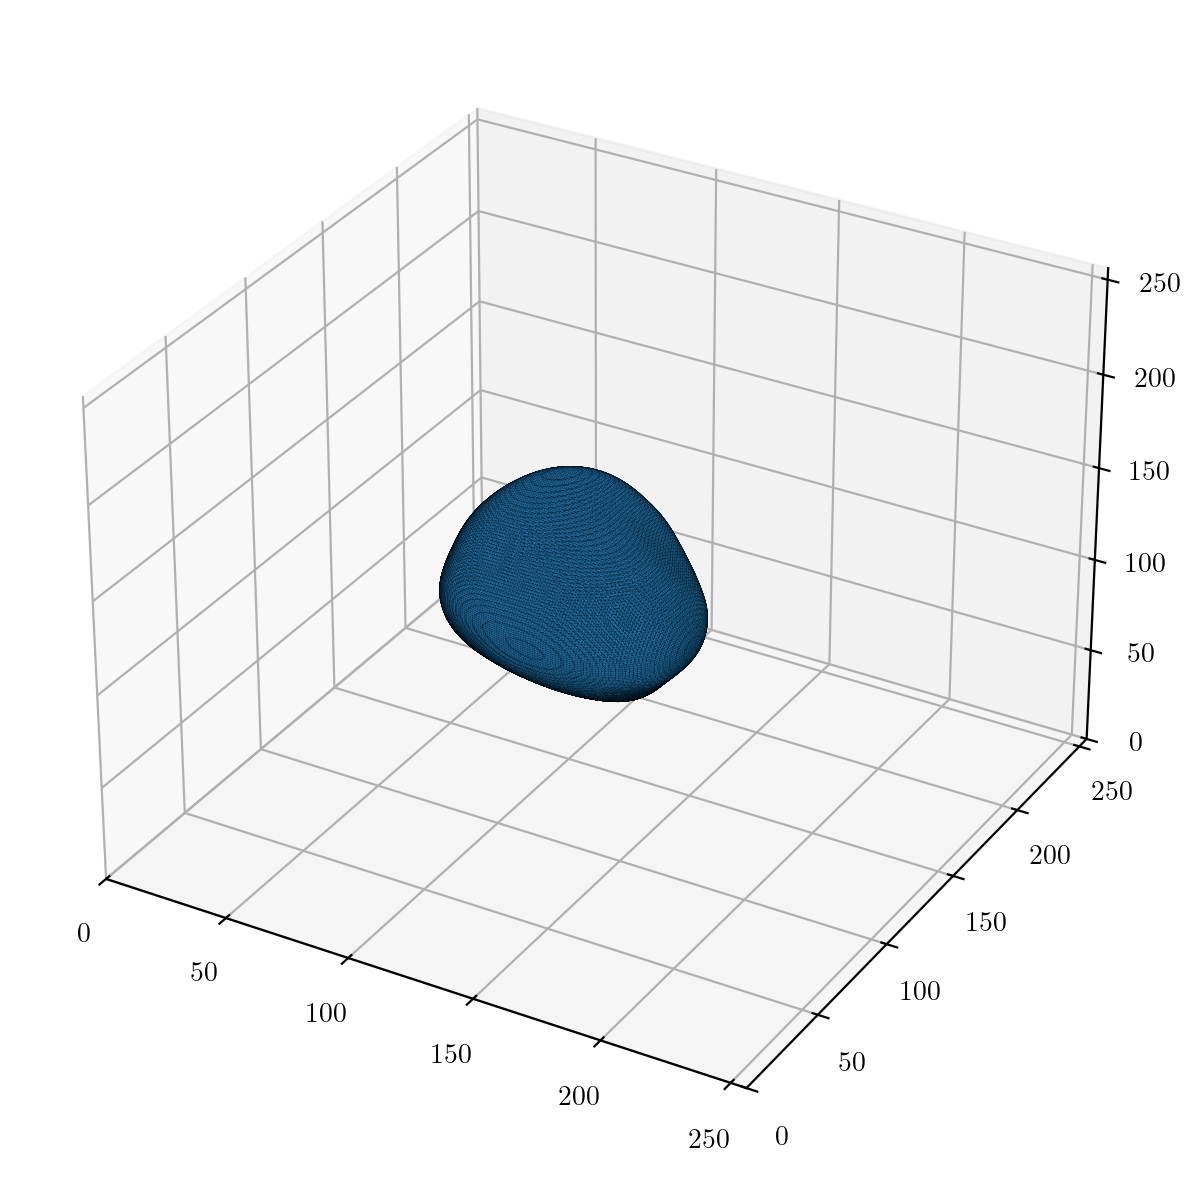

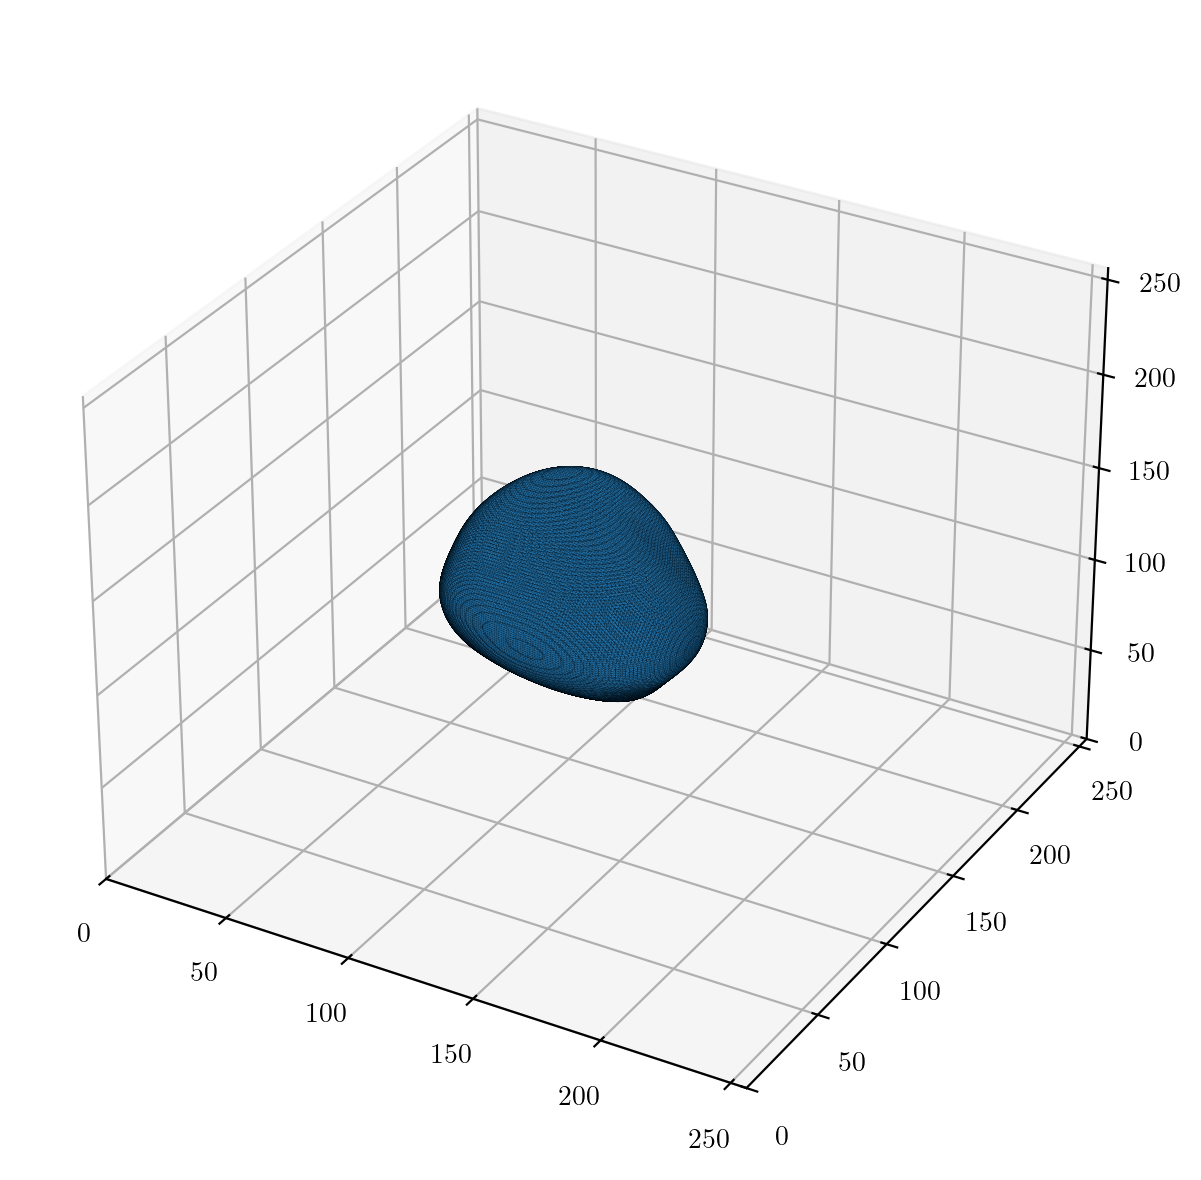

In [4]:
# Visualise interface

from src.plotting_utils import show_isosurface_plot_from_arr

show_isosurface_plot_from_arr(arr_sdf, 256, 0.0, False)
show_isosurface_plot_from_arr(arr_tanh, 256, 0.5, False)


In [5]:
# Extract 1D lineout from this data, through centroid in +ve x direction, to check interface width empirically

dx = 1 / 256
xs = np.arange(256)
ys = np.arange(256)
zs = np.arange(256)

X, Y, Z = np.meshgrid(xs, ys, zs, indexing='ij')

centroid_y = np.sum(Y * arr) / np.sum(arr)
centroid_z = np.sum(Z * arr) / np.sum(arr)

print(centroid_y, centroid_z)

lineout = arr[:, int(centroid_y), int(centroid_z)]

plt.plot(lineout, marker='o')
plt.show()

sdf = np.linspace(-10, 10, 21)
epsilon = 1
tanh = 0.5 * (1 + np.tanh(-sdf / (2 * epsilon)))
plt.plot(tanh, marker='o')
epsilon = 2
tanh = 0.5 * (1 + np.tanh(-sdf / (2 * epsilon)))
plt.plot(tanh, marker='o')
plt.ylim(0, 1)
plt.show()

NameError: name 'arr' is not defined

INFO:src.datasets.phi_field_dataset:Constructed splits of size (number of runs NOT snapshots): train=10, val=2
INFO:src.datasets.phi_field_dataset:Loaded 3 files for split train
INFO:src.datasets.phi_field_dataset:First file: /Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/data/2023-05-12-09-22-Folder_999_Restart_001_0.125091.npz
INFO:src.datasets.phi_field_dataset:Generated 3 samples of HIT data with interface representation InterfaceRepresentationType.TANH
INFO:src.datasets.phi_field_dataset:Each sample has shape torch.Size([1, 256, 256, 256])
INFO:src.datasets.phi_field_dataset:Generated 192 patches of size 64^3 from 3 volumes
INFO:src.datasets.phi_field_dataset:Constructed splits of size (number of runs NOT snapshots): train=10, val=2
INFO:src.datasets.phi_field_dataset:Loaded 3 files for split train
INFO:src.datasets.phi_field_dataset:First file: /Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/data/2023-05-12-09-22-Folder_999_Restart_001

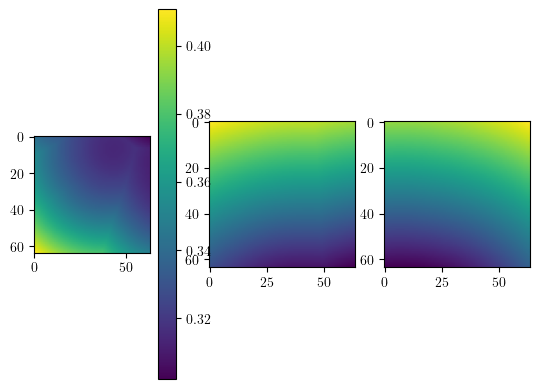

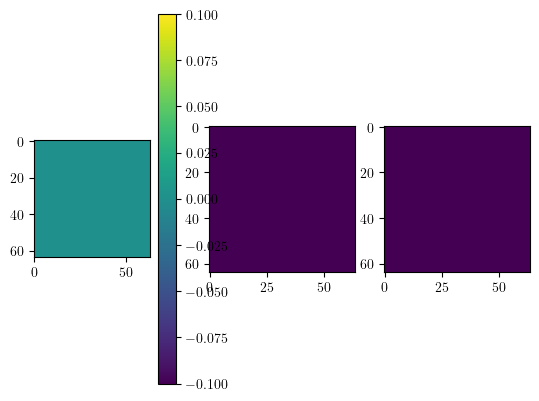

In [7]:

dataset_tanh = PatchPhiDataset(data_dir=project_dir() / 'data',
                          split='train',
                          debug=True,
                          interface_rep=InterfaceRepresentationType.TANH,
                          epsilon=1/256
                          )

dataset_sdf = PatchPhiDataset(data_dir=project_dir() / 'data',
                         split='train',
                         debug=True,
                         interface_rep=InterfaceRepresentationType.SDF
                         )


# Visualise 3 orthogonal slices from element of dataset
ind = 1
arr_sdf = dataset_sdf[ind][0].numpy()
arr_tanh = dataset_tanh[ind][0].numpy()

fig, axs = plt.subplots(1, 3)
im = axs[0].imshow(arr_sdf[32, :, :])
axs[1].imshow(arr_sdf[:, 32, :])
axs[2].imshow(arr_sdf[:, :, 32])
fig.colorbar(im, ax=axs[0])
plt.show()

fig, axs = plt.subplots(1, 3)
im = axs[0].imshow(arr_tanh[32, :, :])
axs[1].imshow(arr_tanh[:, 32, :])
axs[2].imshow(arr_tanh[:, :, 32])
fig.colorbar(im, ax=axs[0])
plt.show()

